## **GRAPH CLASSIFICATION EXAMPLE**

In [3]:
# Install the necessary packages 
#!pip install stellargraph

**Download the data of interest**

We will download the Cora dataset, that consists of 2708 scientific publications classified into one of seven classes. 

* The citation network consists of 5429 links. 
* Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. 
* The dictionary consists of 1433 unique words.

In [4]:
from stellargraph.datasets import Cora
import os

cora = Cora()
cora.download()

# paths
cora_cites_file = os.path.join(cora.base_directory, "cora.cites")
cora_content_file = os.path.join(cora.base_directory, "cora.content")

In [5]:
cora_cites_file

'/Users/erika/stellargraph-datasets/cora/cora.cites'

In [6]:
cora_content_file

'/Users/erika/stellargraph-datasets/cora/cora.content'

A look to the data:

* **Edges:** here the order is “paper X cites paper Y”.

In [10]:
import numpy as np
import pandas as pd

cora_cites = pd.read_csv(
    cora_cites_file,
    sep="\t",  # tab-separated
    header=None,  # no heading row
    names=["target", "source"],  # set our own names for the columns
)
cora_cites.head()

,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960


* **Nodes:** The names of the 0/1-columns don’t matter so much, but we can give the first column (of IDs) and the last one (of subjects) useful names.

In [12]:
cora_feature_names = [f"w{i}" for i in range(1433)]

cora_raw_content = pd.read_csv(
    cora_content_file,
    sep="\t",  # tab-separated
    header=None,  # no heading row
    names=["id", *cora_feature_names, "subject"],  # set our own names for the columns
)
cora_raw_content.head()

,id,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


### Treatments:
* Indexing: Transform the id column in index.
* Separate target variable (subject) from the features
* Divide the data in training/testing set
* Apply one hot encoding to the target: transform categorical variable in numeric variable

In [13]:
# indexing
cora_content_str_subject = cora_raw_content.set_index("id")
cora_content_str_subject

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,subject
id,,,,,,,,,,,,,,,,,,,,,
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms


In [14]:
# remove columns
cora_content_no_subject = cora_content_str_subject.drop(columns="subject")
cora_content_no_subject

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1423,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432
id,,,,,,,,,,,,,,,,,,,,,
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1061127,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Create the graph (using “homogeneous graph with features”, details [here](https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html))

In [16]:
from stellargraph import StellarGraph
cora_no_subject = StellarGraph({"paper": cora_content_no_subject}, {"cites": cora_cites})
print(cora_no_subject.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


If we’re trying to predict the subject, we’ll probably need to use the subject labels as ground-truth labels in a supervised or semi-supervised machine learning task. This can be extracted from the DataFrame and held separately, to be passed in as training, validation or test examples.

In [17]:
cora_subject = cora_content_str_subject["subject"]
cora_subject

id
31336             Neural_Networks
1061127             Rule_Learning
1106406    Reinforcement_Learning
13195      Reinforcement_Learning
37879       Probabilistic_Methods
                    ...          
1128975        Genetic_Algorithms
1128977        Genetic_Algorithms
1128978        Genetic_Algorithms
117328                 Case_Based
24043             Neural_Networks
Name: subject, Length: 2708, dtype: object

**Divide in train/test samples**

In [18]:
from sklearn import model_selection

cora_train, cora_test = model_selection.train_test_split(
    cora_subject, train_size=0.25, random_state=123
)
cora_train

id
191222            Neural_Networks
1109208        Genetic_Algorithms
308003              Rule_Learning
13205      Reinforcement_Learning
3217                       Theory
                    ...          
642827      Probabilistic_Methods
1126315           Neural_Networks
1105718           Neural_Networks
3084                   Case_Based
80491             Neural_Networks
Name: subject, Length: 677, dtype: object

In [19]:
cora_test

id
1103969     Probabilistic_Methods
1119295             Rule_Learning
1130567    Reinforcement_Learning
59045                      Theory
1129494           Neural_Networks
                    ...          
126867                 Case_Based
1105764    Reinforcement_Learning
782486            Neural_Networks
74821       Probabilistic_Methods
41732      Reinforcement_Learning
Name: subject, Length: 2031, dtype: object

**Starting the analysis**

The previous steps were an example of how to transform a dataset into a graph. Now load a graph to work with the application of the methodology.

In [28]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

import os
import networkx as nx

from stellargraph.data import BiasedRandomWalk

from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

In [29]:
dataset = datasets.Cora()
#display(HTML(dataset.description))

In [30]:
dataset

The data consists in the the largest connected components, ignoring isolated nodes and subgraphs.

In [31]:
G, node_subjects = dataset.load(largest_connected_component_only=True)

In [32]:
node_subjects

31336             Neural_Networks
1061127             Rule_Learning
1106406    Reinforcement_Learning
13195      Reinforcement_Learning
37879       Probabilistic_Methods
                    ...          
1128975        Genetic_Algorithms
1128977        Genetic_Algorithms
1128978        Genetic_Algorithms
117328                 Case_Based
24043             Neural_Networks
Name: subject, Length: 2485, dtype: object

In [33]:
G

In [34]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2485, Edges: 5209

 Node types:
  paper: [2485]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5209]
        Weights: all 1 (default)
        Features: none


In [51]:
#nx.draw_networkx(G, pos = pos, with_labels=False, 
#                 node_size=15, width=0.3, node_color='blue', edge_color='grey')

## **The Node2Vec algorithm**

The Node2Vec algorithm introduced is a 2-step **representation learning algorithm**. The two steps are,

* Use second-order random walks to generate sentences from a graph. A sentence is a list of node ids. The set of all sentences makes a corpus.

* The corpus is then used to learn an embedding vector for each node in the graph. Each node id is considered a unique word/token in a dictionary that has size equal to the number of nodes in the graph. The Word2Vec algorithm, is used for calculating the embedding vectors.

In [35]:
def PlotGraph_v2(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(121)
    pos = nx.spring_layout(Gplot, k=0.1)
    
    betCent = nx.betweenness_centrality(Gplot, normalized=True, endpoints=True)
    node_color = [20000.0 * Gplot.degree(v) for v in Gplot]
    node_size =  [v * 10000 for v in betCent.values()]
    nx.draw(Gplot, pos, with_labels=True, font_weight='bold',  
            node_size=6600, 
            node_color='#A0CBE2')
    limits=plt.axis('off') # turn of axis
    


In [36]:
rw = BiasedRandomWalk(G)

walks = rw.run(
    nodes=list(G.nodes()),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 24850


In [37]:
from gensim.models import Word2Vec

str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)

In [38]:
# The embedding vectors can be retrieved from model.wv using the node ID as key.
model.wv["19231"].shape

(128,)

In [39]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = node_subjects[[int(node_id) for node_id in node_ids]]

In [40]:
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

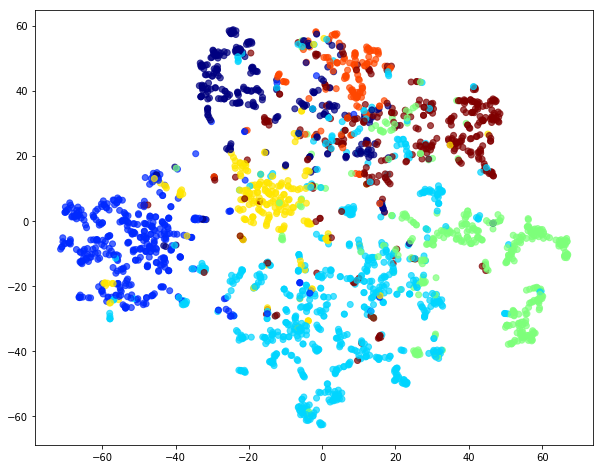

In [41]:
# draw the points
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(10, 8))
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)

In [42]:
# X will hold the 128-dimensional input features
X = node_embeddings
# y holds the corresponding target values
y = np.array(node_targets)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, test_size=None)

In [44]:
print(
    "Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(
        X_train.shape, y_train.shape, X_test.shape, y_test.shape
    )
)

Array shapes:
 X_train = (248, 128)
 y_train = (248,)
 X_test = (2237, 128)
 y_test = (2237,)


In [45]:
clf = LogisticRegressionCV(
    Cs=10, cv=10, scoring="accuracy", verbose=False, multi_class="ovr", max_iter=300
)
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=300, multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring='accuracy',
                     solver='lbfgs', tol=0.0001, verbose=False)

In [46]:
y_pred = clf.predict(X_test)

In [47]:
accuracy_score(y_test, y_pred)

0.7778274474742959

**References:**

* [Node classification with Node2Vec](https://stellargraph.readthedocs.io/en/stable/demos/node-classification/node2vec-node-classification.html)

* [Graph tutorial](https://stellargraph.readthedocs.io/en/stable/demos/basics/loading-pandas.html)

* https://stellargraph.readthedocs.io/en/stable/demos/node-classification/gcn-node-classification.html

Please check: https://stellargraph.readthedocs.io/en/stable/demos/index.html